### Universidad Galileo 
### Postgrado en Análisis y predicción de Datos
### Ciencia de Datos en Python
### Nixon Armando López Claudio 
### Proyecto 1 - Regresión Lineal con Python

<h1><center> Proyecto 1 - Regresión Lineal con Python </center></h1>

## Introducción

### De acuerdo a la información relevante del proyecto, lo que se pretende es aplicar los conocimientos de python y conocimientos básicos de análisis predictivos, básicamente una regresión lineal simple que como modelo ayuda a predcir las variables de la mejor manera posible, con esto se utiliza de forma matemática el descenso del gradiente que estima numéricamente mediante una función el error mínimo, es decir ayuda a minimizar el error, y con esto optimiza el modelo de regresión lineal simple (modelos univariables)

### De acuerdo a información proporcionada por el libro de Gutiérrez y Vladimirovna (2016) los datos numéricos que están relacionados abundan en todas partes, ya sea en los negocios, la economía y otras ciencias o disciplinas. Entre los ejemplos que se pueden brindar son los siguientes:

### - La cantidad de anuncios de un producto determinado que se presenta en los medios de comunicación está relacionada con sus ventas.
### - El número de artículos que no cumplen con las normas de calidad está relacionado con el costo del producto. 
### - El calentamiento de un cable en un circuito eléctrico está relacionado con el voltaje aplicado a éste y su tiempo de uso.
### - El rendimiento de un compuesto químico está afectado por la temperatura y la presión.
### - El precio de licitación para un proyecto de construcción de carreteras puede estar relacionado con su longitud y la cantidad de licitaciones.


### En este contexto, uno de los ejemplos se relaciona con el proyecto principal de este proyecto, que es la explicación de la variable precio de la vivienda de acuerdo a sus variables independientes; como metros cuadrados, el piso, las habitaciones; entre otras variables que puedan afectar el modelo principal, puede ser multivariable para mayor simplicidad, pero por cuestiones de explicación y práctica se aplica el presente modelo de forma simple o univariable. 

## Algunos aspectos importantes de la regresión lineal simple

### Con base al libro Gutiérrez y Vladimirovna (2016), el modelo de regresión lineal, puede ser usado para procesos, de predicción, control u optimización, ya sea de la producción o de las ventas del producto de acuerdo al giro del negocio de una empresa, el análisis de regresión es una técnica estadística utilizada para la estimación de las relaciones entre las variables, que incluye muchas técnicas para modelar y analizar varias variables, cuando la atención se centre en la relación entre una variable dependiente y una o más variables independientes. 

### El análisis de regresión es muy utilizado para la predicción, previsión y determinación de cómo están relacionadas las variables independientes con la variable dependiente, con el objetivo de explorar las formas de estas relaciones (inferir las relaciones causales entre las variables independientes y dependientes). En general, el modelo de regresión se define en términos de un número finito de parámetros desconocidos que se estiman a partir de los datos de la muestra y depende, en cierta medida, de hacer suposiciones acerca del proceso de estimación. Estos supuestos deben ser comprobables cuando se dispone de una muestra de tamaño considerable. Los modelos de regresión para predicciones son útiles, incluso cuando los supuestos son violados de forma moderada, aunque en estos casos pueden no funcionar de manera óptima. 

## Definición Principal

### De acuerdo con Gutiérres y Vladimirovna (2016), los modelos que se emplean para relacionar una variable dependiente y con otra u otras variables independientes x1, x2,..., xm se denominan ***modelos de regresión o modelos estadísticos*** porque expresan el valor medio de y para los valores dados de x1, x2,..., xm.

### A partir de la definición anterior, y de acuerdo con la relación que se encuentre entre las variables, se clasifica el tipo de regresión. Por ejemplo, si la relación entre ambas variables x y y es lineal, al modelo se le llama ***modelo de regresión lineal***.

### En un modelo de regresión, a la variable por predecir o por modelar, y, la denominamos ***variable dependiente*** o ***de respuesta***, y a las variables que se utilizan para predecir o modelar a y las denominamos ***variables independientes*** o ***predictoras***.

### en general, no se conocen los valores exactos de los parámetros, ni el error, por tal razón, debido a que se trata de situaciones aleatorias en los errores y variables dependientes, buscamos estimaciones de estos parámetros a partir de datos muestrales, con lo cual determinamos la línea recta que mejor ajusta a este conjunto de puntos y la llamamos recta de regresión muestrral o recta de regresión lineal: 
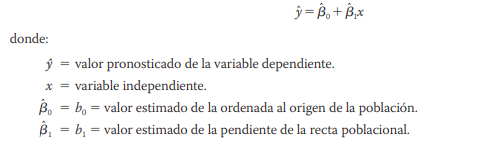

### si se desea ampliar información respecto a teoría de regresión lineal se puede consultar el libro de Gutiérrez E y Vladimirovna O (2016), ***Estadística inferencial 1 para Ingeniería y Ciencias***, pp. 361.

### Cargar las librarías necesarias

In [1]:
# Importar Librerías (Entorno de anaconda con los paquetes necesarios para efectuar el proceso de Regresión Lineal con Python)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math 
import sys 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


### Cargar Datos

In [2]:
df_datos = pd.DataFrame(np.load("proyecto_training_data.npy")\
                  ,columns = ['sale_price','overallquial','stfloor_square','room','year_built','lot_frontage']) #Carga de datos

In [3]:
df_datos.info() #información de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_price      1460 non-null   float64
 1   overallquial    1460 non-null   float64
 2   stfloor_square  1460 non-null   float64
 3   room            1460 non-null   float64
 4   year_built      1460 non-null   float64
 5   lot_frontage    1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [4]:
df_datos.head(11) #esto ayuda a verificar la forma en que está estructurada la data.

,sale_price,overallquial,stfloor_square,room,year_built,lot_frontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
6,307000.0,8.0,1694.0,7.0,2004.0,75.0
7,200000.0,7.0,1107.0,7.0,1973.0,NaN
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0


In [5]:
df_datos.shape # esto ayuda cuántas líneas de filas y cuántas columnas se tienen en la data.

(1460, 6)

In [6]:
df_datos.describe() # acá se determina el análsisis de datos principal de cada variable, es decir un análisis estadístico principal. 

,sale_price,overallquial,stfloor_square,room,year_built,lot_frontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [7]:
df_datos['lot_frontage'] = df_datos['lot_frontage'].fillna( df_datos['lot_frontage'].mean() ) 
df_datos['lot_frontage'] = df_datos['lot_frontage'].astype(int)
df_datos['year_built'] = df_datos['year_built'].astype(int)
df_datos["valor1"] = 1            # esta es otra forma de analizar los datos

### En este momento, será necesario separar los datos en 2 datasets: Entrenamiento 80 % y Prueba 20%

In [8]:
x = df_datos.iloc[:,1:].values #esta es la variable independiente
y = df_datos.iloc[:,:1].values #esta es la variable dependiente

In [9]:
x_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(x,y, test_size = 0.2 , random_state = 2) #se obtiene el 80% de entrenamiento y 20% de prueba

>A continuación se obtienen los datos principales del 80 % de los datos, es decir 1168 datos de cada variable, en el que se obtienen la cantidad de datos, la media, la desviación estándar, el valor mínimo y el valor máximo, para cada variable de la base de datos.

In [10]:
df_datos_entrenamiento = (pd.DataFrame(x_entrenamiento)).rename(columns = {0:'overallquial',1:'stfloor_square',2:'room',3:'year_built',4:'lot_frontage' })
df_datos_entrenamiento.describe()

,overallquial,stfloor_square,room,year_built,lot_frontage,5
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.0
mean,6.077055,1158.114726,6.502568,1970.804795,70.067637,1.0
std,1.377710,383.351641,1.633516,30.408663,22.534058,0.0
min,1.000000,334.000000,2.000000,1872.000000,21.000000,1.0
25%,5.000000,884.000000,5.000000,1953.000000,60.000000,1.0
50%,6.000000,1080.000000,6.000000,1972.000000,70.000000,1.0
75%,7.000000,1391.000000,7.000000,2000.000000,79.000000,1.0
max,10.000000,4692.000000,14.000000,2010.000000,313.000000,1.0


### Hitogramas para cada variable

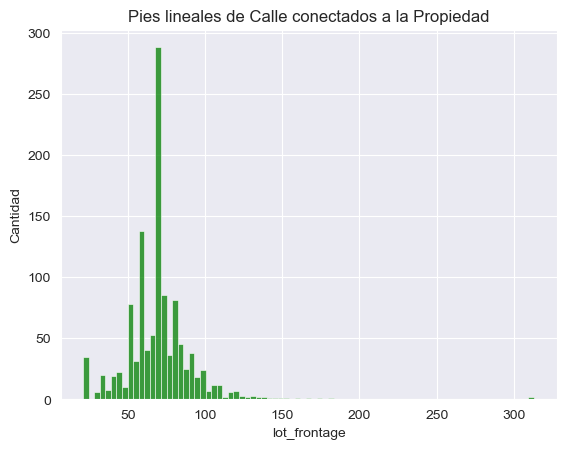

In [11]:
sns.set_style("darkgrid")
histog1 = sns.histplot(data= df_datos_entrenamiento , x="lot_frontage", color= "green")
histog1.set_title("Pies lineales de Calle conectados a la Propiedad")
histog1.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

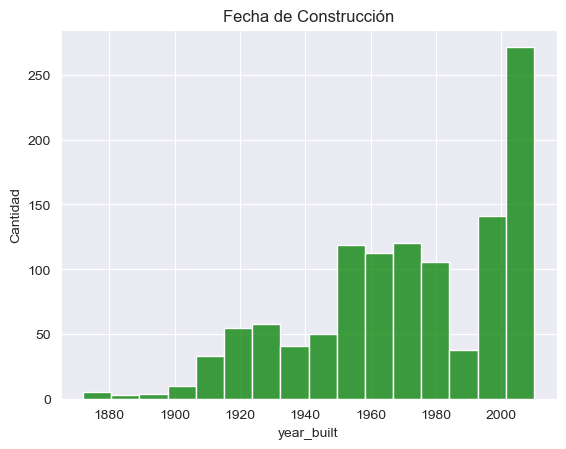

In [12]:
sns.set_style("darkgrid")
histog2 = sns.histplot(data= df_datos_entrenamiento , x="year_built", color= "green")
histog2.set_title("Fecha de Construcción")
histog2.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

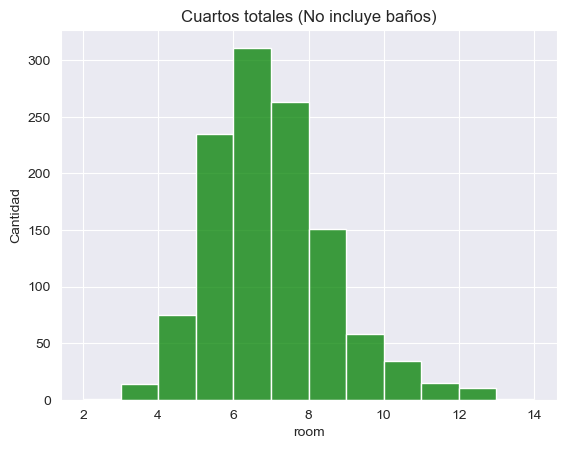

In [13]:
sns.set_style("darkgrid")
histog3 = sns.histplot(data= df_datos_entrenamiento , x="room", binwidth= 1, color= "green")
histog3.set_title("Cuartos totales (No incluye baños)")
histog3.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

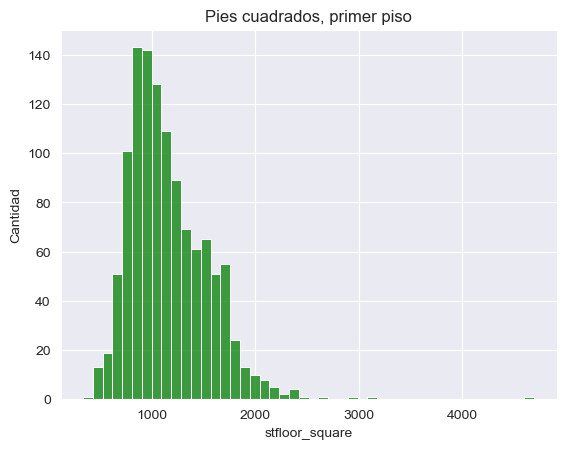

In [14]:
sns.set_style("darkgrid")
histog4 = sns.histplot(data= df_datos_entrenamiento , x="stfloor_square", color= "green")
histog4.set_title("Pies cuadrados, primer piso")
histog4.set(ylabel="Cantidad")
plt.show("  "*(50)," ")

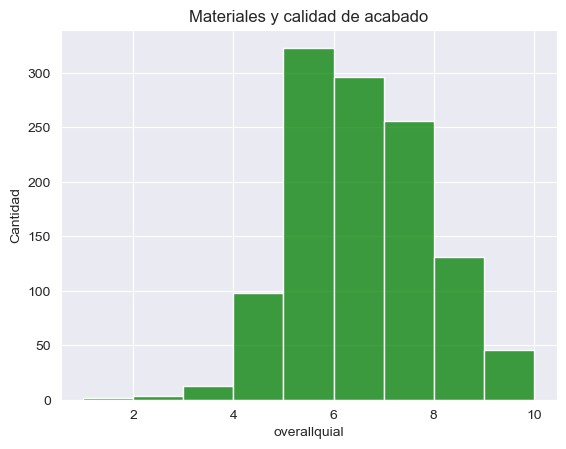

None


In [15]:
sns.set_style("darkgrid")
hist1 = sns.histplot(data= df_datos_entrenamiento , x="overallquial",binwidth = 1, color= "green")
hist1.set_title("Materiales y calidad de acabado")
hist1.set(ylabel="Cantidad")
print(plt.show("  "*(50)," "))

In [16]:
df_datos_entrenamiento.columns

Index(['overallquial', 'stfloor_square', 'room', 'year_built', 'lot_frontage',
       5],
      dtype='object')

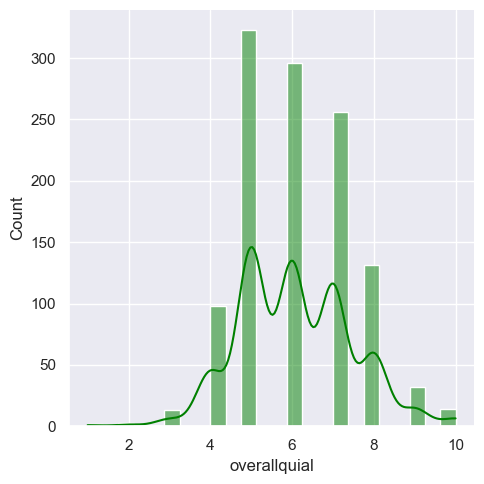

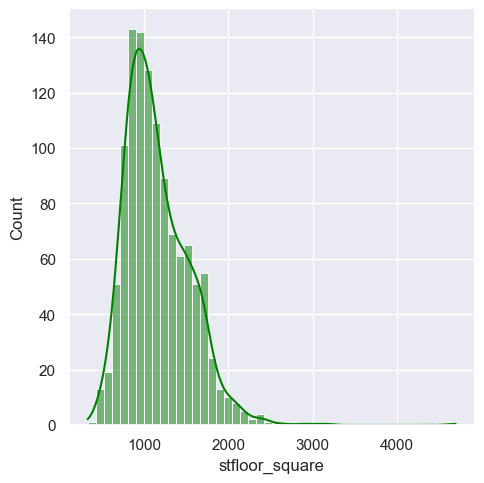

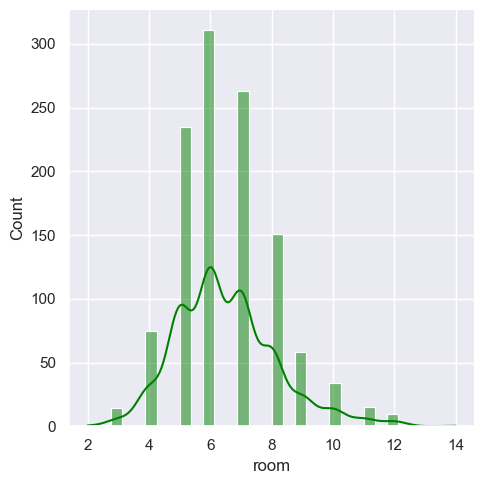

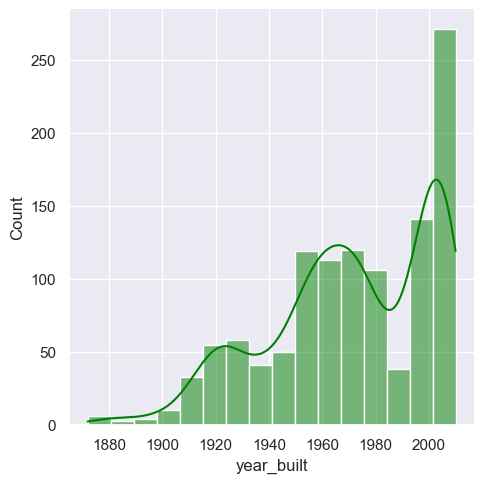

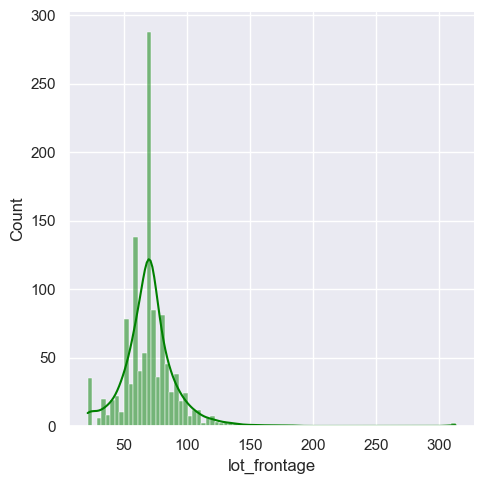

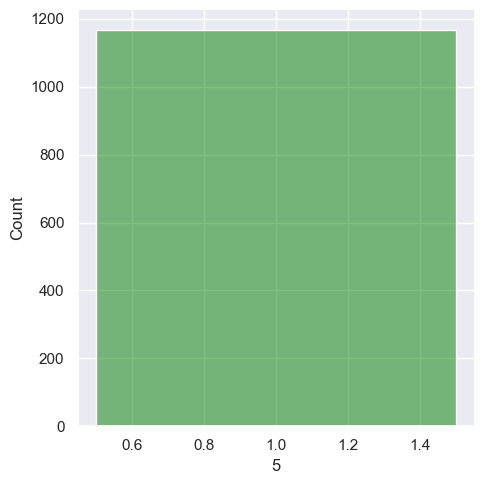

In [17]:
#esta es otra forma de cargar los histogramas 
sns.set_theme(style="darkgrid") 

#sns.regplot(x=df_datos_entrenamiento.iloc[:, 0], y=df_datos_entyrenamiento.iloc[:, 1], color='green')
for columna in df_datos_entrenamiento.columns:
    sns.displot(df_datos_entrenamiento[columna],kde=True, color='green')

### Cálculo del Coeficiente de Correlación

In [18]:
df_entrenamiento2 =  df_datos_entrenamiento
df_entrenamiento2["sales"] = pd.DataFrame(y_entrenamiento)

df_entrenamiento2.corr()

df_entrenamiento2[["sales", "overallquial", "stfloor_square", "room", "year_built", "lot_frontage"]].corr()
#esta es una forma de verificar las correlaciones entre las variables

#Lo ideal es identificar cuál es la correlación entre la variable dependiente (Precio) y las variables independientes.

,sales,overallquial,stfloor_square,room,year_built,lot_frontage
sales,1.000000,0.784354,0.600807,0.516417,0.530730,0.342592
overallquial,0.784354,1.000000,0.487609,0.420649,0.569732,0.235686
stfloor_square,0.600807,0.487609,1.000000,0.403753,0.289333,0.430213
room,0.516417,0.420649,0.403753,1.000000,0.093958,0.316486
year_built,0.530730,0.569732,0.289333,0.093958,1.000000,0.132546
lot_frontage,0.342592,0.235686,0.430213,0.316486,0.132546,1.000000


In [19]:
def correlacion(matriz_y, matriz_x):
    lista = ['overallquial','stfloor_square','room','year_built','lot_frontage']
    coeficiente = []
    for i in range(0,len(matriz_x[0])-1):
        coef = np.corrcoef(matriz_y[:,0],matriz_x[:,i])
        a = ("Correlación entre sales_price y "+ str(lista[i])+" "+ str(round ((coef[0][1]),3) ))
        coeficiente.append(str(a))
    return coeficiente

#correlacion(y_entrenamiento,x_entrenamiento)  #Función de los coeficientes de correlación

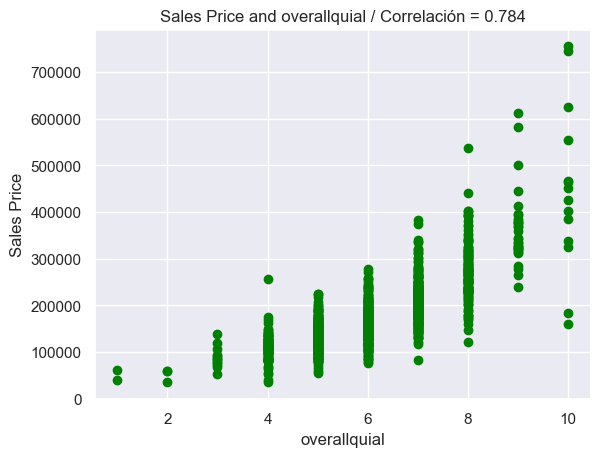

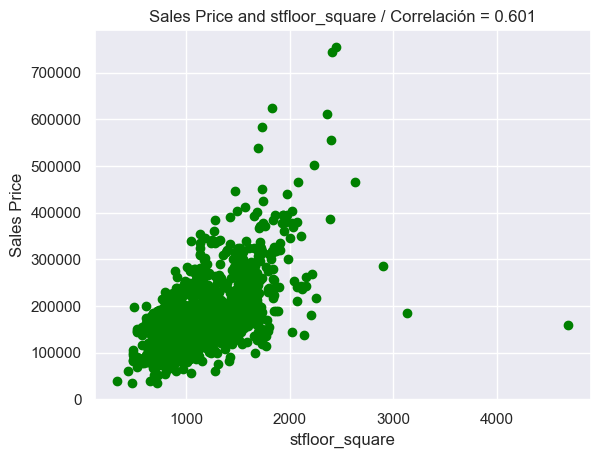

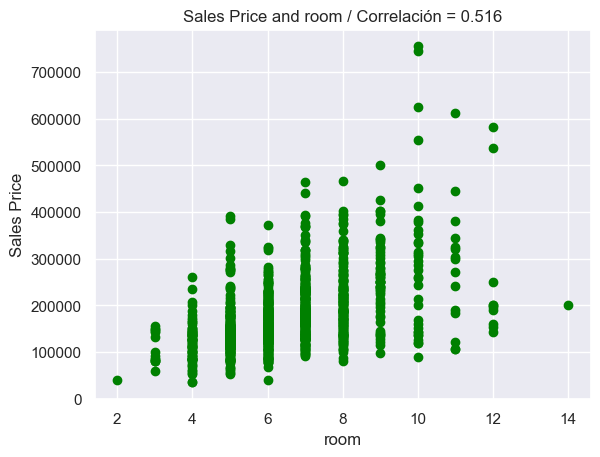

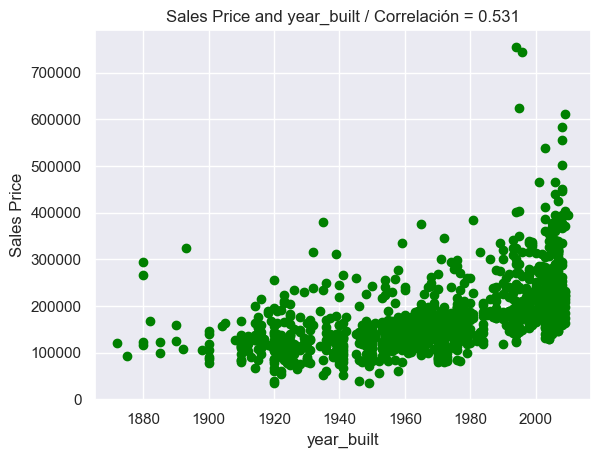

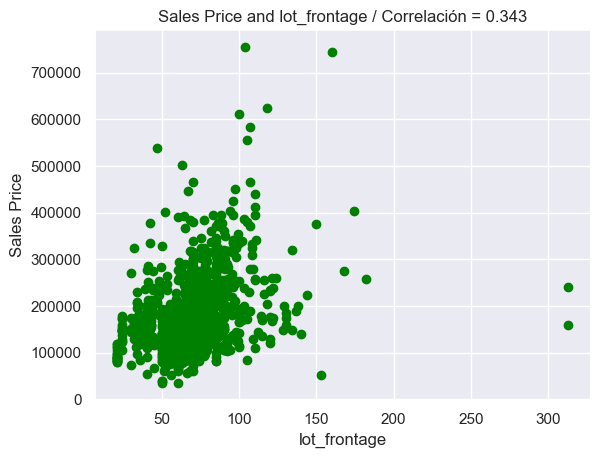

In [20]:
def scatter(variable_x, coeficiente=0):
    plt.scatter(x = df_datos_entrenamiento[[variable_x]], y= pd.DataFrame(y_entrenamiento),color = 'green')
    plt.title("Sales Price and"+" "+variable_x+" / "+ "Correlación = "+correlacion(y_entrenamiento,x_entrenamiento)[coeficiente][-5:]   )
    plt.xlabel(variable_x)
    plt.ylabel("Sales Price")
    return plt.show()
#Esta es la función para visualizar el Gráfico de dispersión
scatter('overallquial')
scatter('stfloor_square',1)
scatter('room',2)
scatter('year_built',3)
scatter('lot_frontage',4) 

>Al observar la relación de cada variable respecto al precio, se logra observar que la variable que más correlación tiene es overallquial con 0.791, seguido por la segunda variable stfloor_square con 0.621

### En este punto se puede empezar el análisis de Regresión Lineal

In [21]:
sns.set_style("darkgrid")
def procedimiento(epocas_, learning_rate,iteracion_epocas , x ,y  ):
    """Función que realiza el modelo predictivo de la regresión lineal simple """
 

    # Descenso del gradiente
    def g_descendiente(w_, b_, alfa, x, y):
        #""" Función del descenso del gradiente, """
        N = x.shape[0]     

        beta_0 = -(2/N)*np.sum(y-(w_*x+b_))   
   
        beta_1 = -(2/N)*np.sum(x*(y-(w_*x+b_)))

        beta0 = b_ - alfa * beta_0
        beta1 = w_ - alfa * beta_1
    
        return beta1, beta0
      

    np.random.seed(2)
    beta1 = np.random.randn(1)[0] 
    beta0 = np.random.randn(1)[0] 

    alfa = learning_rate 
    epocas = epocas_ 


    error = np.zeros((epocas,1)) #Almacena los errores de cada iteración en relación al tiempo
    history_b0 = [] #Almacena el historial de beta0
    history_b1 = [] #Almacena el historial de beta1
    
    for i in range(epocas):
    #Lo que permite que cada iteración actualice el peso de cada valor es el descenso del gradiente
        [beta1, beta0] = g_descendiente(beta1,beta0,alfa,x,y)
        history_b0.append(beta0) 
        history_b1.append(beta1) 

    #Estimación de y
        y_estimada =  beta0 + beta1*x

     #ECM = error cuadrático medio
        N = y.shape[0]
        error[i] = np.sum((y-y_estimada)**2)/N
    
    #Resultados 
        if (i+1)% iteracion_epocas == 0:  
            print("Epoch {}".format(i+1)) 
            print("....... beta1: {:.1f}".format(beta1), " beta0: {:.1f}".format(beta0)) 
            print("....... error: {}".format(error[i])) 
            print("---------------------------------------")
    
    plt.plot(range(epocas_), error, color ="green")
    plt.xlabel('Epoch')
    plt.title("Descenso del Gradiente, Epoch = {epocas} ".format(epocas =str( epocas_)  ), fontsize = 13 )
    plt.suptitle("Gráfico")
    plt.ylabel('Error Cuadrádico Medio')
    plt.show()
    
    return beta0, beta1, epocas, error, history_b0, history_b1, plt.show() 

Epoch 200
....... beta1: 23653.6  beta0: 3516.0
....... error: [4.32405672e+09]
---------------------------------------
Epoch 400
....... beta1: 28464.2  beta0: 4079.5
....... error: [2.9175814e+09]
---------------------------------------
Epoch 600
....... beta1: 29461.0  beta0: 4045.7
....... error: [2.85827795e+09]
---------------------------------------
Epoch 800
....... beta1: 29685.9  beta0: 3891.3
....... error: [2.85416562e+09]
---------------------------------------
Epoch 1000
....... beta1: 29754.5  beta0: 3712.7
....... error: [2.85232051e+09]
---------------------------------------


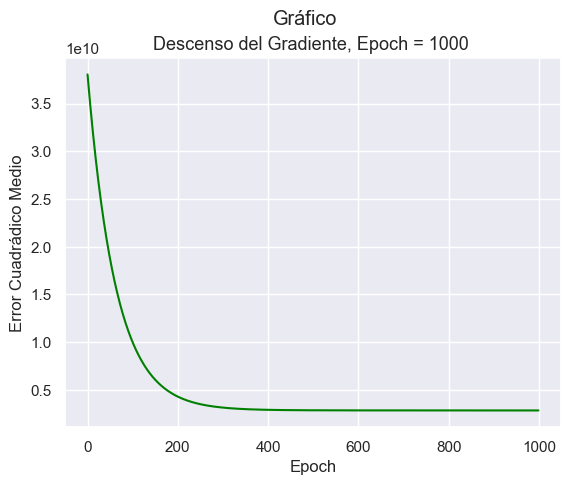

In [22]:
prediccion = procedimiento(1000,0.0001,200,  x_entrenamiento[:,0], y_entrenamiento[:,0] )

In [23]:
def desarrollo_modelo(datoIncercepto, datoPendiente, x_entrenamiento, y_entrenamiento, repeticiones):
   
    lista_b0 = list(datoIncercepto) # datos del intercepto
    lista_b1 = list(datoPendiente) # datos de la pendiente

    for i in range(0, len(lista_b0), repeticiones ): # el parametro n : imprime el numero de veces que se requiera
        y_estimada = lista_b0[i] + lista_b1[i] * x_entrenamiento  
        colors=['red', 'blue']
        # grafico del plot
        plt.plot(x_entrenamiento, y_entrenamiento, 'go', label='Datos de entrenamiento')
        plt.plot(x_entrenamiento, y_estimada , 'k', label='modelo')
        plt.title(f'Evolución del modelo después de {i+1} iteraciones')
        plt.xlabel('')
        plt.legend()
        plt.show()

### A este punto se puede comprobar si funciona el modelo al ejecutarlo; como sigue:

Epoch 200
....... beta1: 23653.6  beta0: 3516.0
....... error: [4.32405672e+09]
---------------------------------------
Epoch 400
....... beta1: 28464.2  beta0: 4079.5
....... error: [2.9175814e+09]
---------------------------------------
Epoch 600
....... beta1: 29461.0  beta0: 4045.7
....... error: [2.85827795e+09]
---------------------------------------
Epoch 800
....... beta1: 29685.9  beta0: 3891.3
....... error: [2.85416562e+09]
---------------------------------------
Epoch 1000
....... beta1: 29754.5  beta0: 3712.7
....... error: [2.85232051e+09]
---------------------------------------


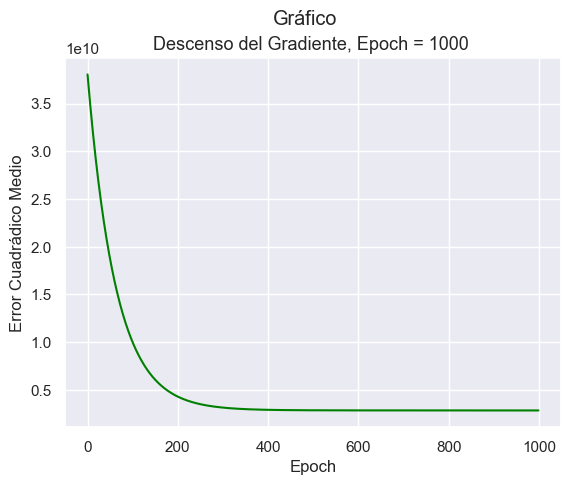

In [24]:
predicción = procedimiento(1000,0.0001,200,  x_entrenamiento[:,0], y_entrenamiento[:,0] )

### A continuación se verifica el desarrollo del modelo en relación al tiempo

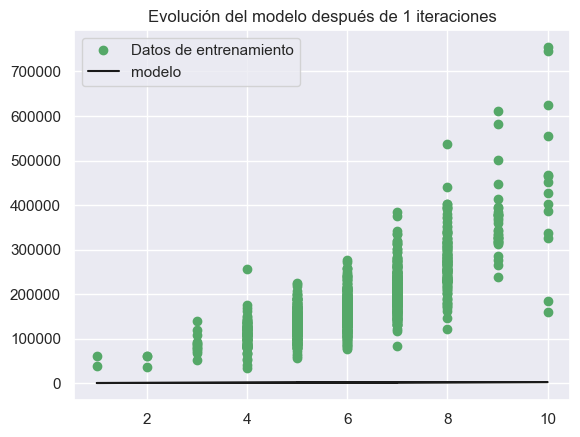

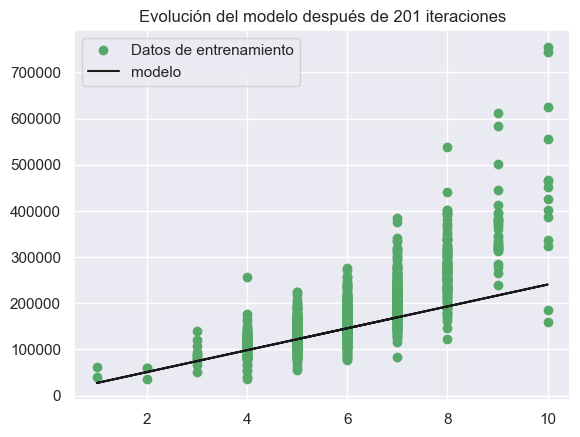

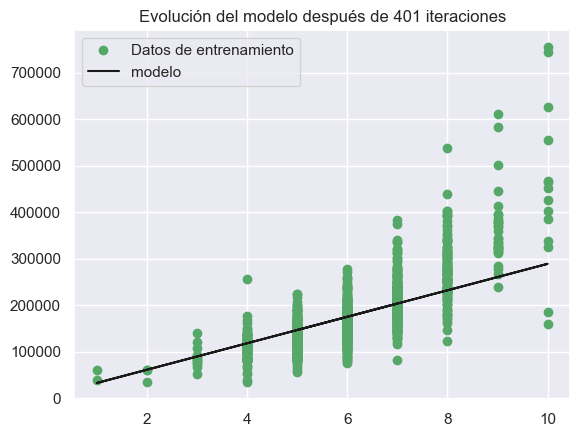

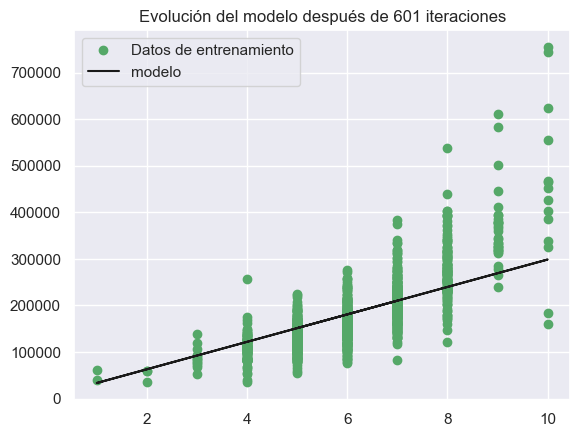

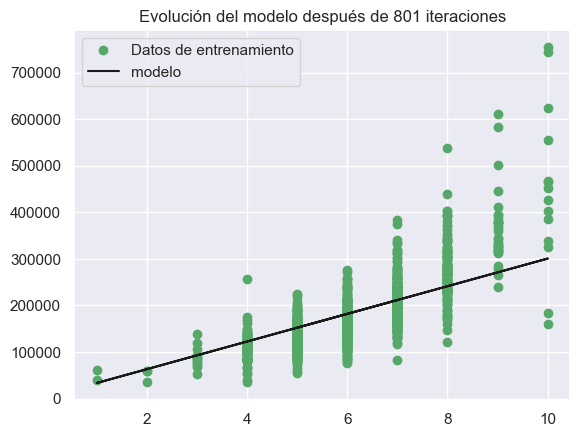

In [25]:
desarrollo_modelo(prediccion[4], prediccion[5], x_entrenamiento[:,0], y_entrenamiento[:,0], 200)

### Prueba de los resultados

In [26]:

def Evolucion_plot_ver_resultados(beta0, beta1, data_x, data_y, label_, condicion_, data_x2=0):
    x_p = data_x
    y_estimada = beta0 + beta1 * data_x
    condicion = condicion_
    if condicion == "entrenamiento":
        sns.scatterplot(x=x_p, y=data_y, label=label_, color='green')
        sns.lineplot(x=x_p, y=y_estimada, color='black', label='modelo')
    else:
        sns.scatterplot(x=data_x2, y=data_y, label=label_, color='green')
        sns.lineplot(x=x_p, y=y_estimada, color='black', label='modelo')

    plt.title("Gráfico de dispersión -{label}-".format(label=label_))
    plt.suptitle("Resultado ")
    plt.xlabel('eje x')
    plt.ylabel('Prices Sales')
    plt.legend()
    plt.show()

### Iteraciones con datos de entrenamiento

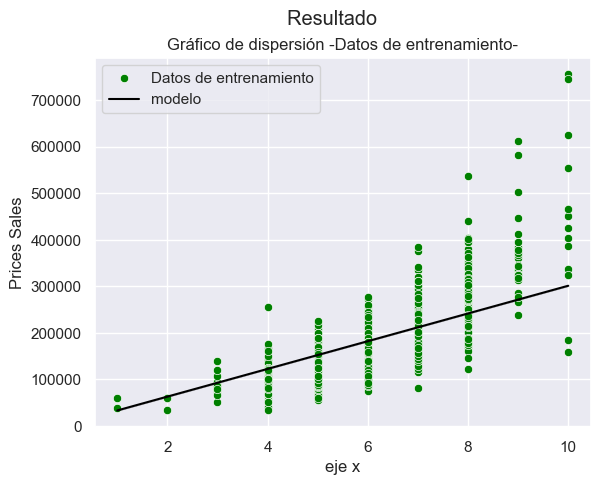

In [27]:
Evolucion_plot_ver_resultados(prediccion[0],prediccion[1],x_entrenamiento[:,0], y_entrenamiento[:,0], 'Datos de entrenamiento', "entrenamiento")

Plot de la última iteración (datos de prueba)

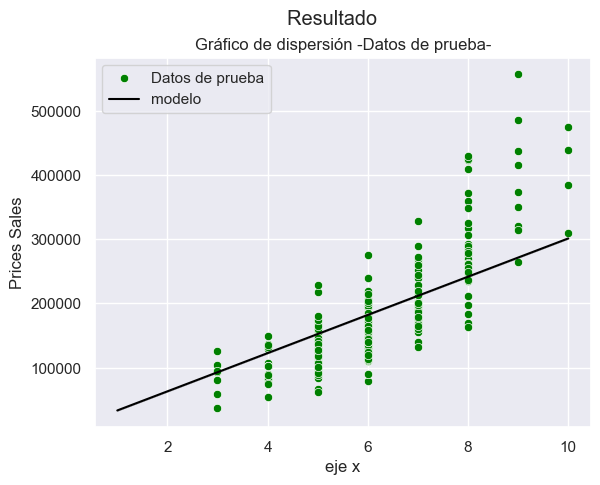

In [28]:
Evolucion_plot_ver_resultados(prediccion[0],prediccion[1],x_entrenamiento[:,0], y_prueba[:,0], 'Datos de prueba',"prueba",x_prueba[:,0])


### Estimaciones 

In [29]:
def estimacion(x_prueba):
    lista= x_prueba
    y_predictivo = []
    x_valores = []
    for i in range(0 , (len(x_prueba)) ):
        y_predictivo.append((np.array(prediccion[0])).astype(int) + (np.array(prediccion[1]))*list(lista)[i])
        x_valores.append(list(lista)[i] )
    
    df = pd.DataFrame()
    df["y_estimado"] = pd.Series(y_predictivo)
    df["valores_de_x"] = pd.Series(x_valores)
    return df

### **ŷ** Estimada y **y** Prueba

In [30]:
pred = pd.DataFrame(estimacion(x_prueba[:,0]))
pred['y_prueba'] = pd.Series(np.squeeze( y_prueba[:,0]))
print(pred.head(31))

       y_estimado  valores_de_x  y_prueba
0   211993.562756           7.0  289000.0
1   182239.053791           6.0  178000.0
2   241748.071721           8.0  359100.0
3   241748.071721           8.0  197000.0
4   211993.562756           7.0  224000.0
5   211993.562756           7.0  221000.0
6   211993.562756           7.0  227000.0
7   182239.053791           6.0  201000.0
8   152484.544826           5.0   84500.0
9   271502.580686           9.0  315000.0
10  182239.053791           6.0  215000.0
11  211993.562756           7.0  207000.0
12  182239.053791           6.0  118000.0
13  152484.544826           5.0  147000.0
14   92975.526895           3.0  105000.0
15  211993.562756           7.0  225000.0
16  241748.071721           8.0  287000.0
17  241748.071721           8.0  284000.0
18  182239.053791           6.0  240000.0
19  241748.071721           8.0  285000.0
20  301257.089651          10.0  310000.0
21  182239.053791           6.0  172500.0
22  182239.053791           6.0  1

Error de la prediccón 
 (datos de prueba)

In [31]:
def calcular_error(y, y_estimada):
    y = np.array(y)
    y_estimada = np.array(y_estimada)
    """Función para obtener el error del modelo """
    N = y.shape[0] # N es el tamaño del dataseto o de las observaciones
    error = np.sum((y - y_estimada)**2) / N
    return error
    
_error = calcular_error(y_prueba[:,0], prediccion[0]+prediccion[1]*x_prueba[:,0])
print (_error)

2836767637.167991


### Sklearn


In [32]:
def modelo_sklearn(data_x, data_y, condicion):
    # Partiendo los datos en el 80% de entrenamiento y 20% prueba
    X_entrenamiento_s, x_prueba_s, y_entrenamiento_s, y_prueba_s = train_test_split(data_x, data_y, test_size =0.2, random_state = 2)

    # Ajustando la regresión lineal simple a los datos de entrenamiento
    regresionLineal = LinearRegression()
    regresionLineal.fit(X_entrenamiento_s, y_entrenamiento_s)
    
    if condicion != "plot":
        return regresionLineal.predict(X_entrenamiento_s)
    else:
        # Resultados con los datos de entrenamiento
        plt.scatter(X_entrenamiento_s, y_entrenamiento_s, color = 'green')
        plt.plot(X_entrenamiento_s, regresionLineal.predict(X_entrenamiento_s), color = 'black')
        plt.title('Gráfico Dispersión (Entrenamientos)')
        plt.xlabel('Variable Independiente')
        plt.ylabel('Sales Prices')
        plt.show()

        # Resultados con los datos de prueba 
        plt.scatter(x_prueba_s, y_prueba_s, color = 'green')
        plt.plot(X_entrenamiento_s, regresionLineal.predict(X_entrenamiento_s), color = 'black')
        plt.title('Gráfico Dispersión (Prueba)')
        plt.xlabel('Variable Independiente')
        plt.ylabel('Sales Prices')
        plt.show()

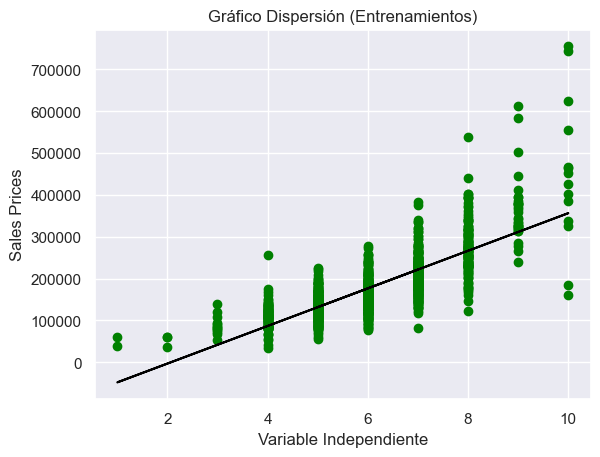

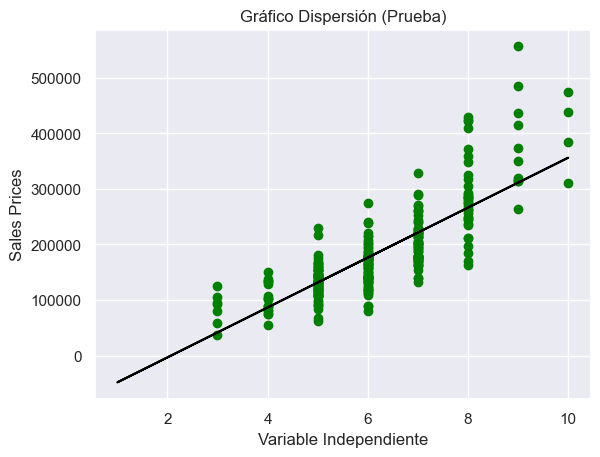

In [33]:
modelo_sklearn(df_datos.iloc[:, 1:2].values, df_datos.iloc[:, :1].values, "plot" )


### Error Modelo1 Vrs Error Modelo2

Epoch 200
....... beta1: 23653.6  beta0: 3516.0
....... error: [4.32405672e+09]
---------------------------------------
Epoch 400
....... beta1: 28464.2  beta0: 4079.5
....... error: [2.9175814e+09]
---------------------------------------
Epoch 600
....... beta1: 29461.0  beta0: 4045.7
....... error: [2.85827795e+09]
---------------------------------------
Epoch 800
....... beta1: 29685.9  beta0: 3891.3
....... error: [2.85416562e+09]
---------------------------------------
Epoch 1000
....... beta1: 29754.5  beta0: 3712.7
....... error: [2.85232051e+09]
---------------------------------------


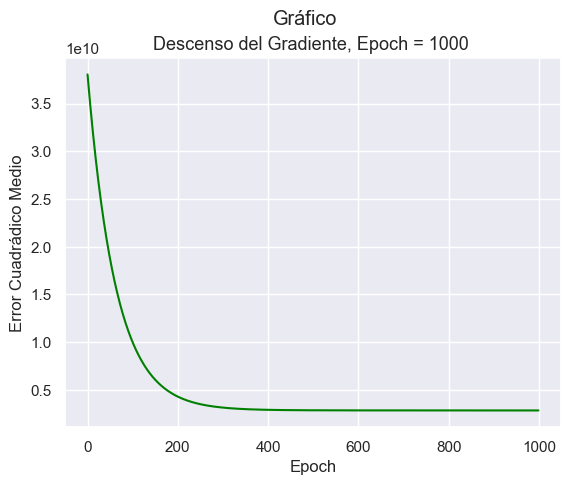

Epoch 200
....... beta1: 151.9  beta0: 0.1
....... error: [4.11033225e+09]
---------------------------------------
Epoch 400
....... beta1: 152.3  beta0: 0.1
....... error: [4.11013639e+09]
---------------------------------------
Epoch 600
....... beta1: 152.3  beta0: 0.1
....... error: [4.11013628e+09]
---------------------------------------
Epoch 800
....... beta1: 152.3  beta0: 0.1
....... error: [4.11013617e+09]
---------------------------------------
Epoch 1000
....... beta1: 152.3  beta0: 0.1
....... error: [4.11013607e+09]
---------------------------------------


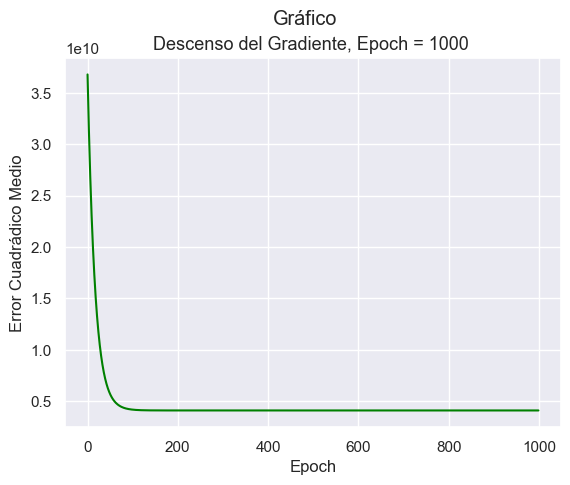

In [34]:
prediccion1 = procedimiento(1000,0.0001,200,  x_entrenamiento[:,0], y_entrenamiento[:,0] ) 
prediccion2 = procedimiento(1000,0.00000001,200,  x_entrenamiento[:,1], y_entrenamiento[:,0] ) 

### Correlacón de ambos modelos 

In [35]:
def coeficiente_correlacion(coeficientes, x_entrenamiento, y_entrenamiento):
    coeficientes = np.array(coeficientes)
    x_entrenamiento = np.array(x_entrenamiento)
    y_entrenamiento = np.array(y_entrenamiento)
    b_ = coeficientes.T
    x_ = x_entrenamiento.T
    y_ = y_entrenamiento

    c1 = np.dot(np.dot(b_,x_),y_)- (len(y_)*((np.mean(y_))**2   ))
    c2 = np.dot(y_.T, y_)- (len(y_)*((np.mean(y_))**2   )) 
    return round( (c1/c2)**(1/2),4 )

### Correlaciones principales entre el precio de la vivienda y las variables independientes

Correlación 1

In [39]:
correlacion = coeficiente_correlacion(prediccion1[0:2], x_entrenamiento[:,[5,0]], y_entrenamiento[:,0])
print(correlacion) 

0.7342


Correlación 2

In [38]:
correlacion_ = coeficiente_correlacion(prediccion2[0:2], x_entrenamiento[:,[5,1]] ,y_entrenamiento[:,0])
print(correlacion) 

<function correlacion at 0x000001345BEB85E0>


### Manual / error 

In [ ]:
sns.set_style("darkgrid")
errorCuadraticoMedio1 = calcular_error( y_prueba[:,0],  prediccion1[0]+prediccion1[1]*x_prueba[:,0] )
errorCuadraticoMedio2 = calcular_error( y_prueba[:,0],  prediccion2[0]+prediccion2[1]*x_prueba[:,1] )

# Gráfico de los errores
x_labels = ['Overqual', '1stFlrSF']
mse_values = [errorCuadraticoMedio1,errorCuadraticoMedio2 ]
plt.bar(x_labels, mse_values, color="green")
plt.xlabel('Variables Independientes')
plt.ylabel('Error Cuadrático Medio')
plt.title("Error Cuadrático Medio")
plt.suptitle("Entrenamiento del Modelo / Manual")
plt.show()

# Mejor modelo para cada variable independiente
mejor_modelo = np.argmin([errorCuadraticoMedio1, errorCuadraticoMedio2], axis=0)
print('El mejor modelo que podría explicar el precio de la vivienda es: el modelo', mejor_modelo+1)

## Conclusión

### Se puede decir que al observar la relación de cada variable respecto al precio, se logra observar que la variable que más correlación tiene es overallquial con 0.791, seguido por la segunda variable stfloor_square con 0.621, así mismo el mejor modelo que podría explicar el precio de la vivienda es el modelo 1.